In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time

from PIL import Image


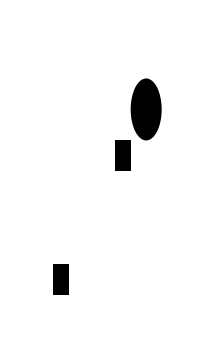

In [168]:
fig2 = plt.figure(frameon=False)
ax2 = fig2.add_subplot(111, aspect=2)
plt.axis('off')
shapes = [
    patches.Rectangle(
        (0.1, 0.1),
        0.1,
        0.1,
        facecolor="black",
        edgecolor="none",  
        fill=True      # remove background
    ),
    patches.Rectangle(
        (0.5, 0.5),
        0.1,
        0.1,
        facecolor="black",
        edgecolor="none",  
        fill=True      # remove background
    ),
    patches.Circle(
        (0.7, 0.7),   # (x,y)
        0.1,  # radius
        facecolor="black",
        edgecolor="none",  
        fill=True
    )
]
for p in shapes: ax2.add_patch(p)    
fig2.savefig('image_test.png', dpi=20, bbox_inches='tight')

In [169]:
try:
    img = Image.open("image_test.png")
except:
    print("Unable to load image")

In [170]:
print(img.format, img.size, img.mode)

PNG (42, 73) RGBA


In [171]:
imggray = img.convert('LA')

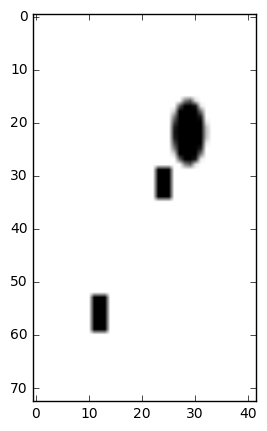

In [174]:
plt.figure(figsize=(5, 5))
plt.imshow(imggray);

In [147]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)/255.0

imgmat.shape

In [148]:
imgmat.shape

(73, 42)

In [150]:
imgmat[70]

matrix([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.]])

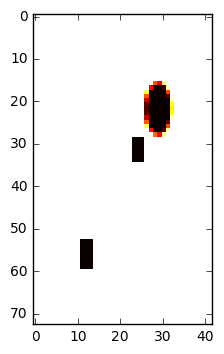

In [151]:
plt.imshow(imgmat, cmap='hot', interpolation='nearest')

In [152]:
U, sigma, V = np.linalg.svd(imgmat)

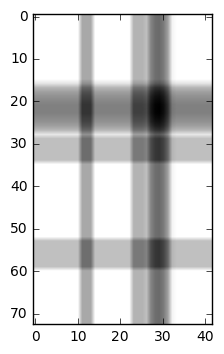

In [166]:
n = 1
reconstimg = np.matrix(U[:, :n]) * np.diag(sigma[:n]) * np.matrix(V[:n, :])
plt.imshow(reconstimg, cmap='gray');

In [155]:
sigma[0]

53.718771900829793

In [156]:
diag_sigma = np.diag(sigma[:5])

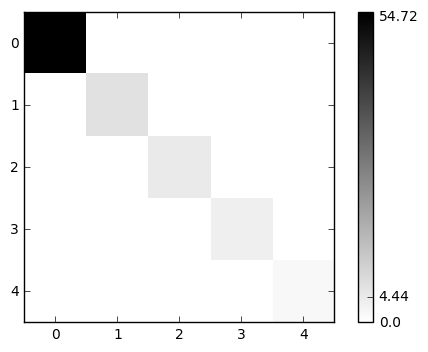

In [159]:
fig, ax = plt.subplots()
cax = ax.imshow(diag_sigma, cmap='binary', interpolation='nearest')
cbar = fig.colorbar(cax, ticks=[0, 4.4, 53])
cbar.ax.set_yticklabels(['0.0', '4.44', '54.72'])  # vertically oriented colorbar